# HOUSE PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np

import warnings as warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df=df[['date','price','bedrooms','bathrooms','floors','waterfront','view','yr_built','zipcode']]

df['year']=df['date'].apply(lambda x:x[:4])
df['month']=df['date'].apply(lambda x:x[4:6])

df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)

df=df.drop('date',1)

In [3]:
df['bathrooms']=df['bathrooms'].apply(lambda x:round(x))
df['building_age']=df['year']-df['yr_built']

df=df.drop('yr_built',1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  float64
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  int64  
 3   floors        21613 non-null  float64
 4   waterfront    21613 non-null  int64  
 5   view          21613 non-null  int64  
 6   zipcode       21613 non-null  int64  
 7   year          21613 non-null  int32  
 8   month         21613 non-null  int32  
 9   building_age  21613 non-null  int64  
dtypes: float64(2), int32(2), int64(6)
memory usage: 1.5 MB


In [5]:
for i in df.columns:
    print(i.upper())
    print(df[i].value_counts())
    print('--'*24)

PRICE
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64
------------------------------------------------
BEDROOMS
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
------------------------------------------------
BATHROOMS
2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: bathrooms, dtype: int64
------------------------------------------------
FLOORS
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64
------------------------------------------------
WATERFRONT
0    21450
1      163
Name: waterfront, dtype: int64
------------------------------------------------
VIEW
0    19489
2      963

<Axes: ylabel='Density'>

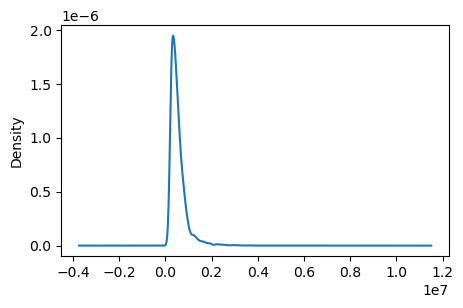

In [6]:
df['price'].plot(kind='kde',figsize=(5,3))

In [7]:
print('the mean price',df['price'].mean())
print('the median price',df['price'].median())
print('the max price',df['price'].max())
print('the min price',df['price'].min())
print('the range of price',df['price'].std())

the mean price 540088.1417665294
the median price 450000.0
the max price 7700000.0
the min price 75000.0
the range of price 367127.1964826997


<Axes: >

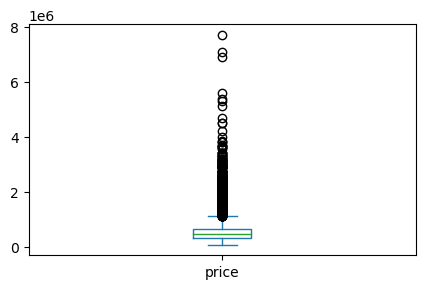

In [8]:
df['price'].plot(kind='box',figsize=(5,3))

In [9]:
x=df.drop('price',1)
y=df['price']

In [10]:
from sklearn.model_selection import train_test_split as tt
x_train,x_test,y_train,y_test=tt(x,y,test_size=0.2)

In [11]:
# importing all the Regressor models and try checking the the r2score close to 1
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [12]:



regressors = [
    ['Linear Regression:', LinearRegression()],
    ['Ridge Regression:', Ridge()],
    ['Lasso Regression:', Lasso()],
    ['ElasticNet Regression:', ElasticNet()],
    ['Decision Tree Regressor:', DecisionTreeRegressor()],
    ['Random Forest Regressor:', RandomForestRegressor()],
    ['Gradient Boosting Regressor:', GradientBoostingRegressor()],
    ['AdaBoost Regressor:', AdaBoostRegressor()],
    ['KNeighbors Regressor:', KNeighborsRegressor()],
    ['Support Vector Regressor:', SVR()]
]


In [13]:
score=[]
for i,reg in regressors:
    model=reg
    model.fit(x_train,y_train)
    predictn=model.predict(x_test)
    score.append(r2_score(y_test,predictn))
    
    print(i,r2_score(y_test,predictn))
    

Linear Regression: 0.4358153964386047
Ridge Regression: 0.43573832165931026
Lasso Regression: 0.43581331296261394
ElasticNet Regression: 0.3396858026371926
Decision Tree Regressor: 0.4564857731581399
Random Forest Regressor: 0.6697953002070387
Gradient Boosting Regressor: 0.6832266577982542
AdaBoost Regressor: -0.7684184373903522
KNeighbors Regressor: 0.4405738769799725
Support Vector Regressor: -0.06258744989108278


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

model_rf = RandomForestRegressor()

reg = GridSearchCV(estimator=model_rf, param_grid=param_grid, return_train_score=True)
reg.fit(x_train, y_train)

best_model = reg.best_estimator_

y_pred = best_model.predict(x_test)

perform_RF = best_model.score(x_test, y_test)

print("Performance of tuned RandomForestRegressor: ", perform_RF)


The house price: $804365.0
